In [2]:
# Linear Discriminent Analysis, LDA
# ---------------------------------

# load wine data
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

# split into training and testing dataset
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

# standardize dataset for LDA
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)
print(pd.DataFrame(X_train_std))

           0         1         2         3         4         5         6   \
0    0.712259  2.220487 -0.130259  0.059629 -0.504327 -0.528316 -1.240000   
1    0.882292 -0.704572  1.175336 -0.090655  2.341479  1.016759  0.662995   
2    0.845856 -0.730230  1.175336  0.811048  0.135979  1.098079  1.163267   
3    0.578661 -0.473646  0.988823 -0.240939  0.776285  0.040922  0.457000   
4   -0.526554  0.090839 -0.689799 -0.391223 -0.362037 -1.146346 -1.377330   
..        ...       ...       ...       ...       ...       ...       ...   
119 -1.158106 -1.046684  0.466585  1.261899 -1.500359 -0.528316 -0.474879   
120  0.445064  1.330995  0.354677  0.961331  0.207124 -0.853595 -1.289047   
121  1.028035  2.297462 -0.577891  0.059629 -1.358069 -2.187238 -1.691226   
122 -1.303849 -1.080895 -0.316772  0.360196  0.135979  1.716108  0.074440   
123 -0.405102  1.296784  0.056255  0.961331  0.135979  0.821591  0.476619   

           7         8         9         10        11        12  
0    0.84

In [15]:
# calculate means of every class for scatter matirx afterward
import numpy as np

means_vectors = []
for i in range(1, 4):
    means_vectors.append(np.mean(X_train_std[y_train==i], axis=0))
print(pd.DataFrame(means_vectors))

# calculate scatter matrix within every class
S_w = np.zeros((13, 13))
for label, mvector in zip(range(1, 4), means_vectors):
    S_i = np.zeros((13, 13))
    n_i = 0
    for sample in X_train_std[y_train==label]:
        sample, mvector = sample.reshape(13, 1), mvector.reshape(13, 1)
        n_i += 1
        S_i += (sample - mvector).dot((sample -mvector).T)
    S_w += S_i / n_i     # scale the S_i matrix before adding to S_w, equals to np.cov(X_train_std[y_train==label].T)
    
print('\nWithin-Class scatter matrix: ', S_w.shape[0], S_w.shape[1])
print(pd.DataFrame(S_w).head())

# calculate scatter matrix 
mean_all = np.mean(X_train_std, axis=0)
S_b = np.zeros((13, 13))
for i, mvector in enumerate(means_vectors):
    n = X_train_std[y_train==i+1, :].shape[0]
    mean_all, mvector = mean_all.reshape(13, 1), mvector.reshape(13, 1)
    S_b += n * (mvector - mean_all).dot((mvector - mean_all).T)

print('\nBetween-Class scatter matrix: ', S_b.shape[0], S_b.shape[1])
print(pd.DataFrame(S_b).head())

         0         1         2         3         4         5         6   \
0  0.906583 -0.349735  0.320103 -0.718914  0.505587  0.880697  0.958947   
1 -0.874880 -0.284800 -0.373472  0.315712 -0.384803 -0.043325  0.063453   
2  0.199215  0.866034  0.168163  0.414845 -0.045118 -1.028555 -1.287560   

         7         8         9         10        11        12  
0 -0.551610  0.541593  0.233831  0.589713  0.656314  1.207494  
1 -0.094606  0.070347 -0.828605  0.314370  0.360843 -0.725286  
2  0.828677 -0.779476  0.964944 -1.208991 -1.362152 -0.401301  

Within-Class scatter matrix:  13 13
         0         1         2         3         4         5         6   \
0  1.213958  0.093768 -0.126211 -0.108766 -0.070689  0.230539  0.073159   
1  0.093768  2.208904  0.113747  0.343224 -0.255878 -0.044478 -0.017131   
2 -0.126211  0.113747  2.541654  1.605433  0.523564  0.384467  0.312207   
3 -0.108766  0.343224  1.605433  2.109594  0.316686  0.149446  0.119812   
4 -0.070689 -0.255878  0.523564

Eigen values in descending order:

358.00420701336566
177.0776864066621
2.8264133989722472e-14
2.455678460973803e-14
2.455678460973803e-14
2.3660340160505548e-14
1.9717729830515574e-14
1.9717729830515574e-14
1.6533619646744298e-14
1.6533619646744298e-14
3.1981902592368867e-15
2.105024386283405e-15
0.0


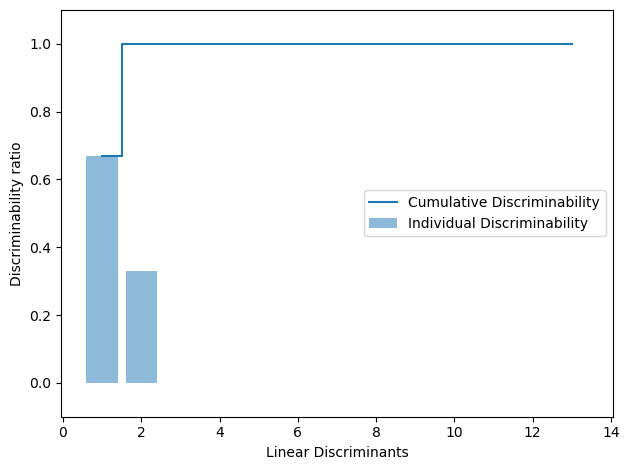

In [4]:
# calculate eigen value and eigen vector
eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(S_w).dot(S_b))

# pair and sort the eigenValue with eigenVector
eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:, i]) for i in range(len(eigen_values))]
eigen_pairs = sorted(eigen_pairs, key=lambda k : k[0], reverse=True)
print('Eigen values in descending order:\n')
for evalue in eigen_pairs:
    print(evalue[0])      # we can see that only two values are not 0 (3-13 are nearly floating point 0)

# visualize discriminability with eigen values
import matplotlib.pyplot as plt
total_eigen_values = np.sum(eigen_values.real)
discriminability = [(i / total_eigen_values) for i in sorted(eigen_values.real, reverse=True)]
cum_discriminability = np.cumsum(discriminability)
plt.bar(range(1, 14), discriminability, 
        alpha=0.5, align='center', 
        label='Individual Discriminability')
plt.step(range(1, 14), cum_discriminability,
         where='mid',
         label='Cumulative Discriminability')
plt.xlabel('Linear Discriminants')
plt.ylabel('Discriminability ratio')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
plt.show() 

In [24]:
# construct a whole LDA functions
def LDA(X_std, y, n_components):
    mean_vectors = []
    labels = len(np.unique(y)) + 1
    for i in range(1, labels):
        mean_vectors.append(np.mean(X_std[y==i], axis=0))
    
    # calculate class with-in scatter matrix
    d = X_std.shape[1]
    S_w = np.zeros((d, d))
    for label, mean_vector in zip(range(1, labels), mean_vectors):
        S_i = np.zeros((d, d))
        n_i = 0
        for row in X_std[y==label]:
            row, mean_vector = row.reshape(d, 1), mean_vector.reshape(d, 1)
            S_i += (row - mean_vector).dot((row - mean_vector).T)
            n_i += 1
        S_w += S_i / n_i 
    
    # calculate class between scatter matrix
    mean_overall = np.mean(X_std, axis=0)
    S_b = np.zeros((d, d))
    for i, mean_vector in enumerate(means_vectors):
        n = X_std[y==i+1, :].shape[0]
        mean_vector, mean_overall = mean_vector.reshape(d, 1), mean_overall.reshape(d, 1)
        S_b += n * (mean_vector - mean_overall).dot((mean_vector - mean_overall).T)

    # pair it together
    eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(S_w).dot(S_b))
    eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:, i]) for i in range(len(eigen_values))]
    eigen_pairs = sorted(eigen_pairs, key=lambda k : k[0], reverse=True)

    # select the top n_components eigen vector and transform
    w = np.hstack(([eigen_pairs[i][1][:, np.newaxis].real for i in range(n_components)]))
    X_LDA = X_std.dot(w)

    return X_LDA

           0         1
0  -0.148392 -0.409286
1   0.091031 -0.158348
2  -0.016754 -0.353597
3   0.148657  0.322040
4  -0.016507 -0.081306
5   0.191230  0.084059
6  -0.733337  0.282823
7  -0.075130 -0.009891
8   0.001959  0.090170
9   0.295304 -0.216767
10 -0.032654  0.274009
11 -0.353872 -0.013300
12 -0.391847 -0.595425
            0         1
0    1.316522 -0.640948
1   -1.418951 -1.214300
2   -1.328835 -0.590717
3   -1.143954 -0.893169
4    1.559411 -0.599371
..        ...       ...
119  0.192466  1.718458
120  1.792537 -1.191582
121  1.995824 -1.062620
122 -0.086318  1.075122
123 -0.171388  1.533407

[124 rows x 2 columns]
            0         1
0    1.316522 -0.640948
1   -1.418951 -1.214300
2   -1.328835 -0.590717
3   -1.143954 -0.893169
4    1.559411 -0.599371
..        ...       ...
119  0.192466  1.718458
120  1.792537 -1.191582
121  1.995824 -1.062620
122 -0.086318  1.075122
123 -0.171388  1.533407

[124 rows x 2 columns]


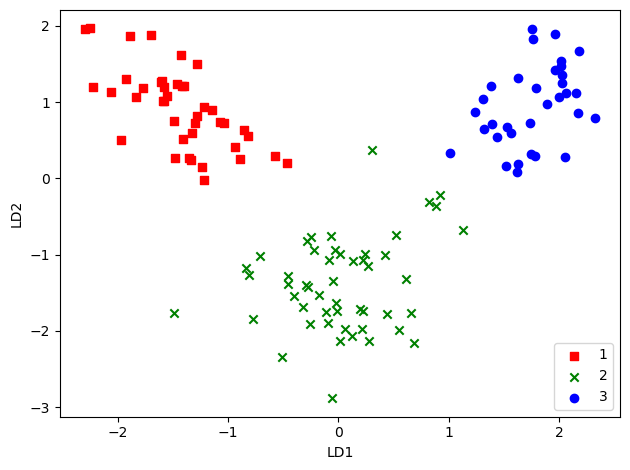

In [26]:
# construct transformation matrix with 
# two of most discriminants eigen vectors

w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real, eigen_pairs[1][1][:, np.newaxis].real))
print(pd.DataFrame(w))

# transform original standardized samples with w matrix
X_train_lda = X_train_std.dot(w)
X_train_lda_1 = LDA(X_train_std, y_train, 2)
print(pd.DataFrame(X_train_lda))
print(pd.DataFrame(X_train_lda_1))
colors = ['r', 'g', 'b']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train==l, 0], 
                X_train_lda[y_train==l, 1] * (-1), 
                c=c, marker=m, label=l)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

c:\Users\12923\Desktop\ML_DataScience\Chapter_4\plot_decision_regions_script.py:38: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[y==col, 0],


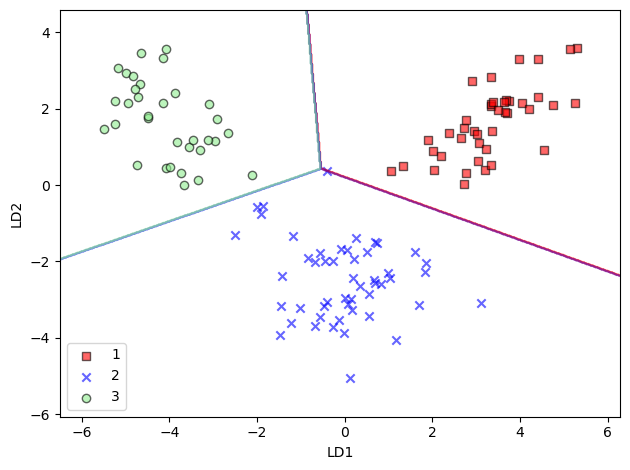

c:\Users\12923\Desktop\ML_DataScience\Chapter_4\plot_decision_regions_script.py:38: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[y==col, 0],


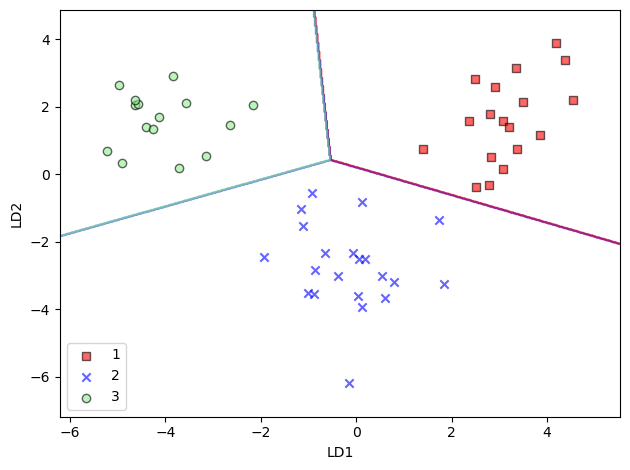

In [ ]:
# LDA with scikit-learn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train_LDA = lda.fit_transform(X_train_std, y_train)

# visualize the final classification result
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr.fit(X_train_LDA, y_train)
from plot_decision_regions_script import plot_decision_regions
plot_decision_regions(X_train_LDA, y_train, classifier=lr)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

X_test_LDA = lda.transform(X_test_std)
plot_decision_regions(X_test_LDA, y_test, classifier=lr)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()